In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd
import array as array
import os
from datetime import datetime



Unique x values: [10.827  10.837  10.8469 10.8569 10.8669 10.8767 10.8869 10.8966 10.9068
 10.9165 10.9268 10.9364 10.9468 10.9563 10.9667 10.9762 10.9867 10.9961
 11.0065 11.0161 11.0264 11.0359 11.0453 11.0551]
Averaged y values: [2.48618182e-05 2.50980000e-05 2.46450000e-05 2.38338462e-05
 2.33665000e-05 2.23493750e-05 2.16763158e-05 2.10019048e-05
 1.92240000e-05 1.65144444e-05 1.35610526e-05 1.30091667e-05
 9.62326087e-06 8.98937500e-06 8.54436842e-06 7.46276471e-06
 6.20491304e-06 5.91782609e-06 5.68008333e-06 5.08966667e-06
 4.81152381e-06 4.13272222e-06 3.17861765e-06 1.95403774e-06]
initial guess [0.01, 10.941479166666667, 0.08]


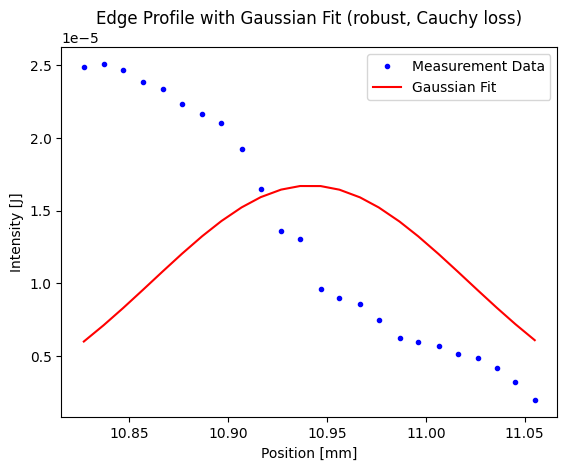

The FWHM is: 187.92694845969984 um


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def cauchy_loss(params, x, y, c):
    A, mu, sigma = params
    #A = (1/(np.sqrt(2*np.pi)*sigma))
    y_pred = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    residual = y - y_pred
    return np.log(1 + (residual / c)**2).sum()

# Function to define the Gaussian function for curve fitting
def gauss(params, x):
    A, mu, sigma = params
    #A = (1/(sigma*np.sqrt(2*np.pi)))
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Objective function for optimization
def objective(params, x, y, c):
    return cauchy_loss(params, x, y, c)
    


# Reading the measurement data from a CSV file
#filename = 'Babicz.csv'
filename = 'FWHM.csv'
#data = np.genfromtxt(filename, delimiter=',')
data = pd.read_csv(filename)

#x_data = data[:, 1]
#y_data = data[:, 0]
intensity = data.iloc[:, 0] #intensity
position = data.iloc[:, 1] #position

# Step 1: Create a dictionary to collect y values for each x
xy_dict = {}

# Step 2: Populate the dictionary
for x, y in zip(position, intensity):
    if x not in xy_dict:
        xy_dict[x] = []
    xy_dict[x].append(y)

# Step 3: Compute the averages
x_unique = []
y_avg = []

for x in sorted(xy_dict.keys()):  # Sort keys to maintain order
    x_unique.append(x)
    y_avg.append(np.mean(xy_dict[x]))

# Convert lists to numpy arrays (optional)
pos_unique = np.array(x_unique)
int_avg = np.array(y_avg)

# Print the results
print("Unique x values:", pos_unique)
print("Averaged y values:", int_avg)


# Initial guess for parameters
initial_guess = [0.01, np.mean(pos_unique), 0.08]
print("initial guess", initial_guess)

# Perform optimization
result = minimize(objective, initial_guess, args=(pos_unique, int_avg, 1))

# Extract optimized parameters
popt = result.x
#print("popt", popt)


# Calculating the full width at half maximum (FWHM)
FWHM = 2 * np.sqrt(2 * np.log(2)) * popt[2]

# Plotting the data and the fit
plt.plot(pos_unique, int_avg, 'b.', label='Measurement Data')
plt.plot(pos_unique, gauss(popt, pos_unique), 'r-', label='Gaussian Fit')
plt.xlabel('Position [mm]')
plt.ylabel('Intensity [J]')
plt.title('Edge Profile with Gaussian Fit (robust, Cauchy loss)')
plt.legend()
plt.show()

print("The FWHM is:", FWHM*1000, "um")

x_unique before [3.7013, 3.7113, 3.7246, 3.7373, 3.7503, 3.7625, 3.7747, 3.787, 3.8008, 3.8119, 3.825, 3.8368, 3.8507, 3.8624, 3.8745, 3.8874, 3.9005, 3.912, 3.9251, 3.9364, 3.951, 3.9621, 3.9747, 3.9876]
y_avg before [3.50576e-07, 3.55148e-07, 3.827e-07, 4.42812e-07, 4.9458e-07, 6.24712e-07, 8.4154e-07, 1.014652e-06, 1.207672e-06, 1.545016e-06, 1.726812e-06, 2.769884e-06, 4.37956e-06, 5.29012e-06, 5.28572e-06, 5.6526e-06, 6.30932e-06, 6.12976e-06, 6.70672e-06, 6.74808e-06, 7.00404e-06, 6.97196e-06, 6.9e-06, 6.92392e-06]
Unique x values: [0.     0.01   0.0233 0.036  0.049  0.0612 0.0734 0.0857 0.0995 0.1106
 0.1237 0.1355 0.1494 0.1611 0.1732 0.1861 0.1992 0.2107 0.2238 0.2351
 0.2497 0.2608 0.2734 0.2863]
Averaged y values: [9.87958152e-01 9.84363033e-01 9.95178451e-01 1.00000000e+00
 9.61529814e-01 9.55313503e-01 8.68597771e-01 8.95585217e-01
 7.96881745e-01 7.41740543e-01 7.42401853e-01 6.05546825e-01
 3.63616306e-01 2.06845036e-01 1.79521524e-01 1.28819514e-01
 9.98090619e-02 7.379

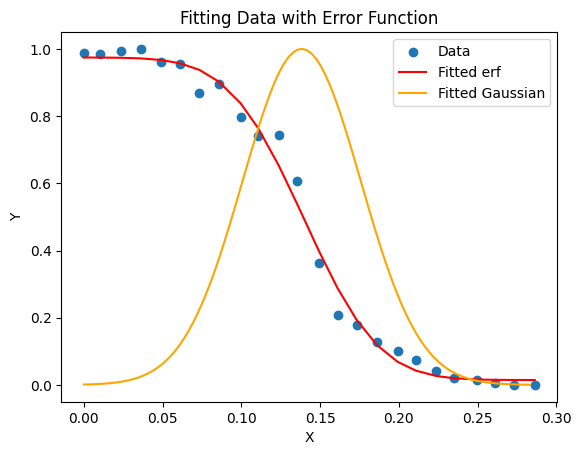

In [9]:
#actual data

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from scipy.special import erfc,erf

# Define the error function model
def error_function(x, a,b,c,d):
    #a,b,c,d = params
    return a * special.erf(b * (x - c)) + d


# Reading the measurement data from a CSV file
#filename = 'Babicz.csv'
#filename = 'FWHM.csv'
#data = pd.read_csv(filename)

#x_data = data.iloc[:, 1] #intensity
#y_data = data.iloc[:, 0] #position

#x_data = np.linspace(1.8,0.65,24)
#y_data = np.array([4.085, 4.066, 3.952, 3.933, 3.92, 3.858, 3.737, 3.613, 3.48, 3.236, 2.8, 2.261, 1.9, 1.569, 1.06, 0.587, 0.44, 0.34,
#0.246, 0.174, 0.143, 0.127, 0.103, 0.086])

x_data = np.array([3.7013, 3.7113, 3.7246, 3.7373, 3.7503, 3.7625, 3.7747, 3.787, 3.8008, 3.8119, 3.825, 3.8368, 3.8507, 3.8624,
          3.8745, 3.8874, 3.9005, 3.912, 3.9251, 3.9364, 3.951, 3.9621, 3.9747, 3.9876])

y_data = np.array([3.505760e-07, 3.551480e-07, 3.827000e-07, 4.428120e-07, 4.945800e-07, 6.247120e-07, 8.415400e-07, 1.014652e-06, 
                   1.207672e-06, 1.545016e-06, 1.726812e-06, 2.769884e-06, 4.379560e-06, 5.290120e-06, 5.285720e-06, 5.652600e-06, 
                   6.309320e-06, 6.129760e-06, 6.706720e-06, 6.748080e-06, 7.004040e-06, 6.971960e-06, 6.900000e-06, 6.923920e-06])


#x_data = np.array([11.0551,11.0453,11.0359,11.0264,11.0161,11.0065,10.9961,10.9867,10.9762,10.9667,10.9563,10.9468,10.9364,10.9267,10.9165,
#10.9068, 10.8966, 10.8869, 10.8767, 10.8569, 10.8469, 10.837, 10.827])
#y_data = np.array([2.9, 3.9, 4.4, 5.1, 5.6, 6.4, 6.1, 7, 8.2, 9, 9, 11, 13, 15, 18, 23, 22, 23, 24, 25, 25, 26, 26])

#x_data = x_data_orig-np.min(x_data_orig)
#print("x_data_orig", x_data)
#y_data = list(reversed((y_data_orig - np.min(y_data_orig)) / (np.max(y_data_orig) - np.min(y_data_orig))))
#print("y_data_orig", y_data)

# Step 1: Create a dictionary to collect y values for each x
xy_dict = {}

# Step 2: Populate the dictionary
for x, y in zip(x_data, y_data):
    if x not in xy_dict:
        xy_dict[x] = []
    xy_dict[x].append(y)

# Step 3: Compute the averages
x_unique = []
y_avg = []

for x in sorted(xy_dict.keys()):  # Sort keys to maintain order
    x_unique.append(x)
    y_avg.append(np.mean(xy_dict[x]))

print("x_unique before", x_unique)
print("y_avg before", y_avg)

#normalize
x_unique_norm = x_unique-np.min(x_unique)
y_avg_norm = list(reversed((y_avg - np.min(y_avg)) / (np.max(y_avg) - np.min(y_avg))))


# Convert lists to numpy arrays 
pos_unique = np.array(x_unique_norm)
int_avg = np.array(y_avg_norm)

# Print the results
print("Unique x values:", pos_unique)
print("Averaged y values:", int_avg)

# Fit the data to the error function model
#initial_guess = [.01, 1, np.mean(x_data), .2e-05]  # Initial guess for parameters
initial_guess = [(min(int_avg)-max(int_avg))/2, 2/(min(int_avg)-max(int_avg)), np.mean(pos_unique), max(int_avg)]
#initial_guess = [-0.5, 20, 0.15, 0.5]
params, covariance = curve_fit(error_function, pos_unique, int_avg, p0=initial_guess)
print("initial guess", initial_guess)

# Plot the original data and the fitted curve
plt.scatter(pos_unique, int_avg, label='Data')
plt.plot(pos_unique, error_function(pos_unique, *params), color='red', label='Fitted erf')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting Data with Error Function')


# Extrapolating
x_interp = np.linspace(np.min(pos_unique), np.max(pos_unique), num=100)
y_interp = error_function(x_interp,*params)


# take derivative
dy = -np.diff(y_interp)
dx = x_interp[:len(dy)]
#plt.plot(dx, dy, 'o', label='derivative')


# define and fit gaussian and plot
def gauss(x, y0, A, x0, sigma): 
    return y0 + A*np.exp(-(x-x0)**2/(2*sigma**2))

#guess = [0, 0.03, 0.15, 0.01]
guess = [0, np.max(dy),((np.max(dx)-np.min(dx))/2), 0.08]

popt, pcov = curve_fit(gauss, dx, dy, p0=guess) 
FWHM = 1000*2*np.sqrt(2*np.log(2))*(popt[3])
print("FWHM =",FWHM,"um")


fwhm=np.full(shape=len(x_unique), fill_value=FWHM, dtype=np.float64)
#print("fwhm",fwhm)

#save the data in a file
combined_array = np.column_stack((x_unique,y_avg,fwhm))

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%Y%m%d_%H%M")
print("date and time =", dt_string)

folder_path = '/Users/cagee/Desktop/'
file_path = os.path.join(folder_path, dt_string+'.dat')
plot_path = os.path.join(folder_path, dt_string+'_plot.png')
#print(file_path)
np.savetxt(file_path, combined_array, delimiter=' ', fmt='%.8f')

plt.plot(dx,(1/np.max(abs(dy)))*gauss(dx,*popt),label='Fitted Gaussian', color='orange')
plt.legend()
plt.savefig(plot_path, format="png")
plt.show()

initial guess [1.36e-05, 10.95, 0.08]
popt [1.36451601e-05 1.09500000e+01 8.00000004e-02]


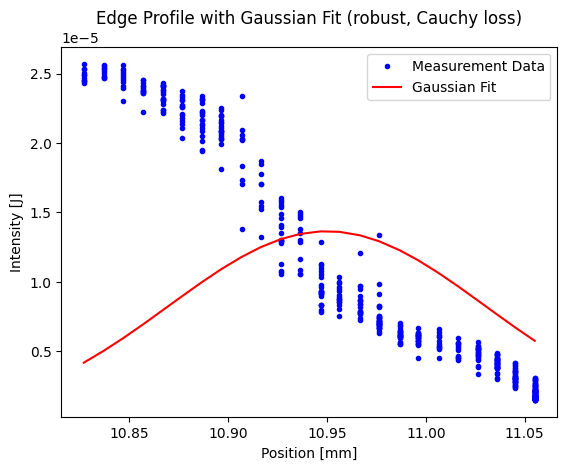

The FWHM is: 20813.865186314822 um


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def cauchy_loss(params, x, y, c):
    A, mu, sigma = params
    #A = (1/(np.sqrt(2*np.pi)*sigma))
    y_pred = A * np.exp(-(x - mu)**2 / (2 * sigma**2))
    residual = y - y_pred
    return np.log(1 + (residual / c)**2).sum()

# Function to define the Gaussian function for curve fitting
def gauss(params, x):
    A, mu, sigma = params
    #A = (1/(sigma*np.sqrt(2*np.pi)))
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Objective function for optimization
def objective(params, x, y, c):
    return cauchy_loss(params, x, y, c)
    


# Reading the measurement data from a CSV file
#filename = 'Babicz.csv'
filename = 'FWHM.csv'
#data = np.genfromtxt(filename, delimiter=',')
data = pd.read_csv(filename)

#x_data = data[:, 1]
#y_data = data[:, 0]
intensity = data.iloc[:, 0] #intensity
position = data.iloc[:, 1] #position


# Initial guess for parameters
initial_guess = [1.36e-05, 10.95, 0.08]
print("initial guess", initial_guess)

# Perform optimization
result = minimize(objective, initial_guess, args=(position, intensity, 1))

# Extract optimized parameters
popt = result.x
print("popt", popt)


# Calculating the full width at half maximum (FWHM)
FWHM = 2 * np.sqrt(np.log(2)) / popt[2]

# Plotting the data and the fit
plt.plot(position, intensity, 'b.', label='Measurement Data')
plt.plot(position, gauss(popt, position), 'r-', label='Gaussian Fit')
plt.xlabel('Position [mm]')
plt.ylabel('Intensity [J]')
plt.title('Edge Profile with Gaussian Fit (robust, Cauchy loss)')
plt.legend()
plt.show()

print("The FWHM is:", FWHM*1000, "um")

1.4142135623730951

initial guesses 3.994 0.3027650354097492 1.0 0.11
popt [1.85836024 6.57108973 1.08747722 2.09883485]
sigma 6.571089729237174
popt[1] 6.571089729237174


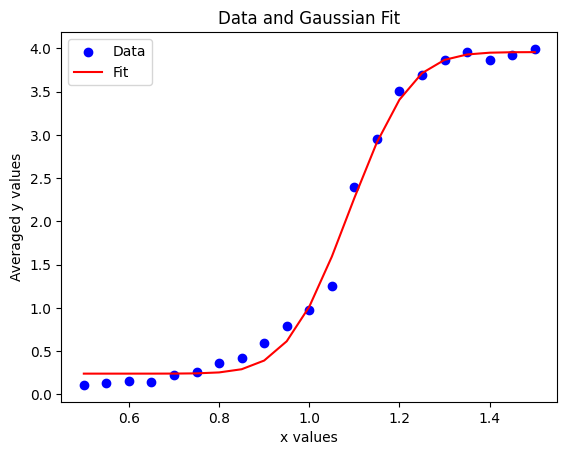

Fitted parameters:
A = 1.8583602437027382
x0 = 1.087477222960124
sigma = 6.571089729237174
FWHM = 0.3576271359595035
FWHM 35.76271359595035 um


In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import special

# Define the Gaussian function
def gaussian(x, A, x0, sigma):
    return A * np.exp(- (x - x0)**2 / (2 * sigma**2))

def error_function(x, A, sigma, x0, d):
    return A * special.erf(sigma * (x - x0)) + d

# Prepare the data
"""
x_data = np.array([10.827, 10.837, 10.8469, 10.8569, 10.8669, 10.8767, 10.8869, 10.8966, 10.9068, 10.9165,
                   10.9268, 10.9364, 10.9468, 10.9563, 10.9667, 10.9762, 10.9867, 10.9961, 11.0065, 11.0161,
                   11.0264, 11.0359])
y_data = np.array([2.48618182e-05, 2.50980000e-05, 2.46450000e-05, 2.38338462e-05, 2.33665000e-05, 2.23493750e-05,
                   2.16763158e-05, 2.10019048e-05, 1.92240000e-05, 1.65144444e-05, 1.35610526e-05, 1.30091667e-05,
                   9.62326087e-06, 8.98937500e-06, 8.54436842e-06, 7.46276471e-06, 6.20491304e-06, 5.91782609e-06,
                   5.68008333e-06, 5.08966667e-06, 4.81152381e-06, 4.13272222e-06])
"""

x_data = np.linspace(1.5,.5,21)
#print(x_data)
y_data = np.array([3.994, 3.923, 3.865, 3.958, 3.865, 3.69, 3.507, 2.949, 2.4, 1.253, 0.98, 0.79, 0.599, 0.418, 0.359, 0.263, 0.22, 0.147, 0.15, 0.133, 0.11])

#x_data = np.linspace(1.8,0.65,24)
#y_data = np.array([4.085, 4.066, 3.952, 3.933, 3.92, 3.858, 3.737, 3.613, 3.48, 3.236, 2.8, 2.261, 1.9, 1.569, 1.06, 0.587, 0.44, 0.34,
#0.246, 0.174, 0.143, 0.127, 0.103, 0.086])


# Fit the data
#popt, pcov = curve_fit(gaussian, x_data, y_data, p0=[max(y_data), np.mean(x_data), np.std(x_data)])
popt, pcov = curve_fit(error_function, x_data, y_data, p0=[max(y_data), np.mean(x_data), np.std(x_data),min(y_data)])
print("initial guesses", max(y_data), np.std(x_data),np.mean(x_data), min(y_data))
# Extract the parameters
A, sigma, x0, d = popt
print("popt", popt)
print("sigma", sigma)
print("popt[1]", popt[1])

# Calculate the FWHM
FWHM = 2.35/popt[1] #2 * np.sqrt(2 * np.log(2)) * sigma

# Plot the data and the fit
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.plot(x_data, error_function(x_data, *popt), label='Fit', color='red')
plt.xlabel('x values')
plt.ylabel('Averaged y values')
plt.title('Data and Gaussian Fit')
plt.legend()
plt.show()

# Print the fitted parameters
print(f'Fitted parameters:\nA = {A}\nx0 = {x0}\nsigma = {sigma}\nFWHM = {FWHM}')
print("FWHM", FWHM*100, "um")

In [11]:
import numpy as np

# Sample data
x_values = np.array([1, 2, 2, 3, 3, 3, 4])
y_values = np.array([10, 20, 30, 40, 50, 60, 70])

# Step 1: Create a dictionary to collect y values for each x
xy_dict = {}

# Step 2: Populate the dictionary
for x, y in zip(x_values, y_values):
    if x not in xy_dict:
        xy_dict[x] = []
    xy_dict[x].append(y)

# Step 3: Compute the averages
x_unique = []
y_avg = []

for x in sorted(xy_dict.keys()):  # Sort keys to maintain order
    x_unique.append(x)
    y_avg.append(np.mean(xy_dict[x]))

# Convert lists to numpy arrays (optional)
x_unique = np.array(x_unique)
y_avg = np.array(y_avg)

# Print the results
print("Unique x values:", x_unique)
print("Averaged y values:", y_avg)

##save the data in a file
#combined_array = np.column_stack((x_unique,y_avg))

#folder_path = '/Users/cagee/Desktop/'
#file_path = os.path.join(folder_path, 'my_data.dat')
#np.savetxt(file_path, combined_array, delimiter=' ', fmt='%d')

Unique x values: [1 2 3 4]
Averaged y values: [10. 25. 50. 70.]
